## 0. Import libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. import data

In [2]:
tripdata_2019_jan = pd.read_csv('data/yellow_tripdata_2019-01.csv')
tripdata = pd.concat([tripdata_2019_jan])

In [3]:
tripdata.shape

(7667792, 18)

In [4]:
tripdata.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
7034123,2,2019-01-29 18:32:17,2019-01-29 19:03:11,2,10.75,1,N,231,42,1,32.5,1.0,0.5,3.50,0.0,0.3,37.80,0.0
3237204,2,2019-01-14 17:44:47,2019-01-14 17:47:18,1,0.34,1,N,170,170,1,3.5,1.0,0.5,1.06,0.0,0.3,6.36,NaN
4108121,2,2019-01-17 21:42:39,2019-01-17 22:05:12,1,9.62,1,N,48,235,1,29.0,0.5,0.5,0.00,0.0,0.3,30.30,NaN
1067648,2,2019-01-05 22:23:57,2019-01-05 22:26:37,1,0.28,1,N,41,24,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,NaN
1064824,2,2019-01-05 22:05:30,2019-01-05 22:14:21,4,1.60,1,N,163,43,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76,NaN


## 2. Data Exploration

In [5]:
tripdata.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [6]:
tripdata = tripdata[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID',
       'payment_type','total_amount']]

In [7]:
tripdata.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

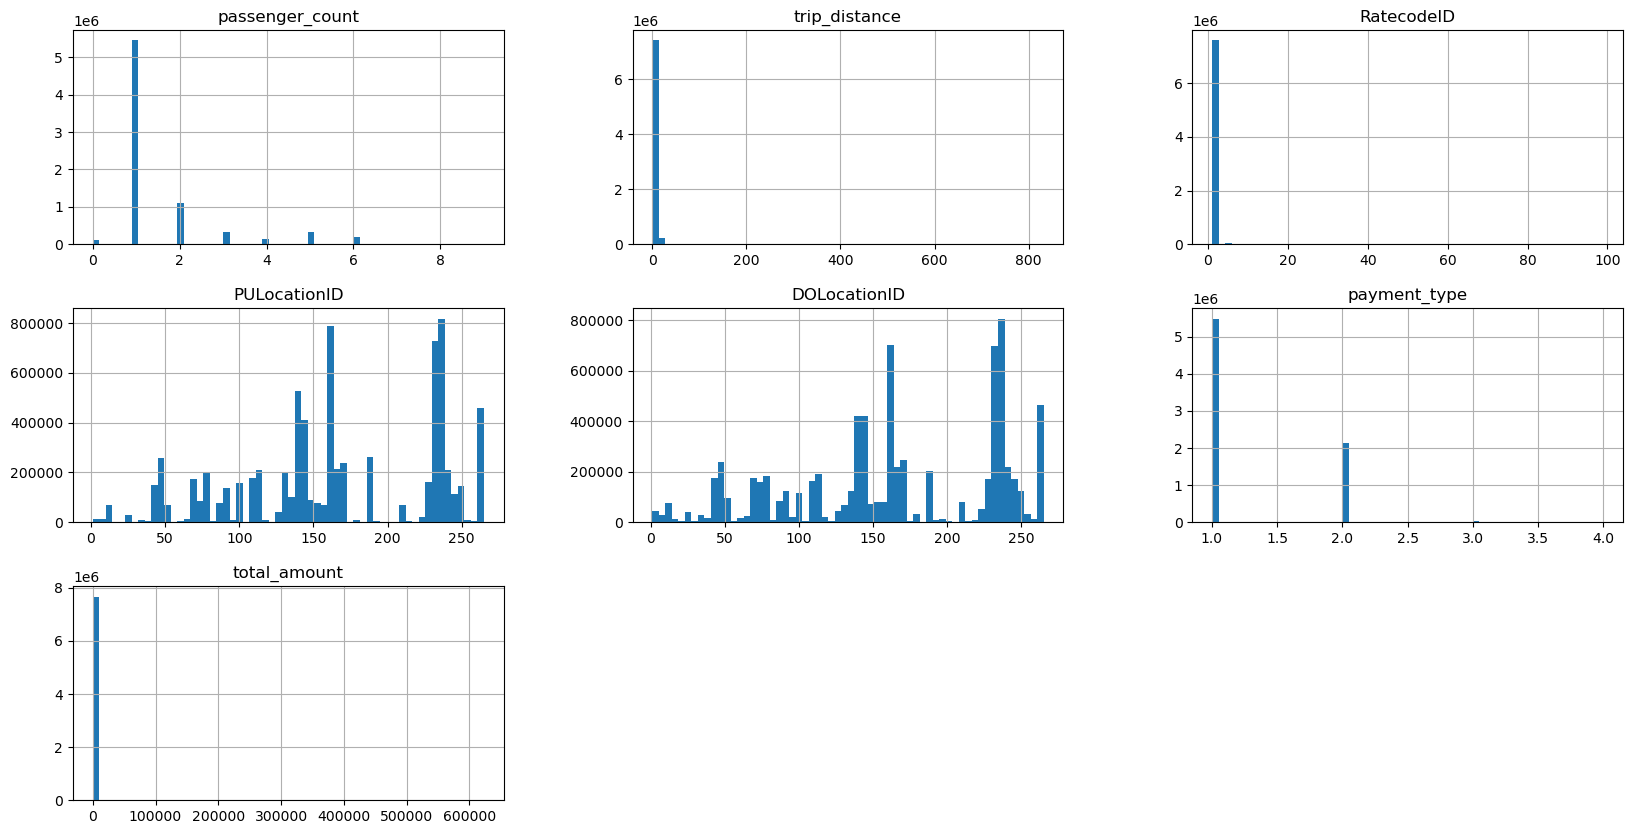

In [8]:
tripdata.hist(figsize=(20,10), bins=60)

In [9]:
tripdata['RatecodeID'].value_counts()

RatecodeID
1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

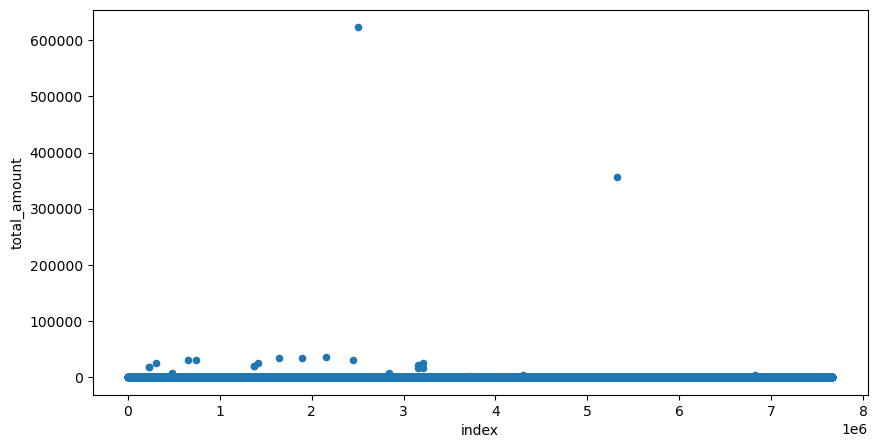

In [10]:
tripdata.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

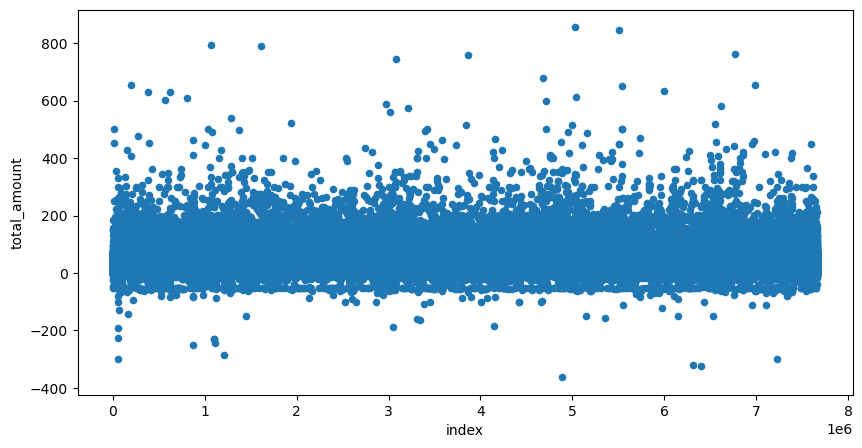

In [11]:
tripdata[tripdata['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

(7131, 9)


<Axes: xlabel='index', ylabel='total_amount'>

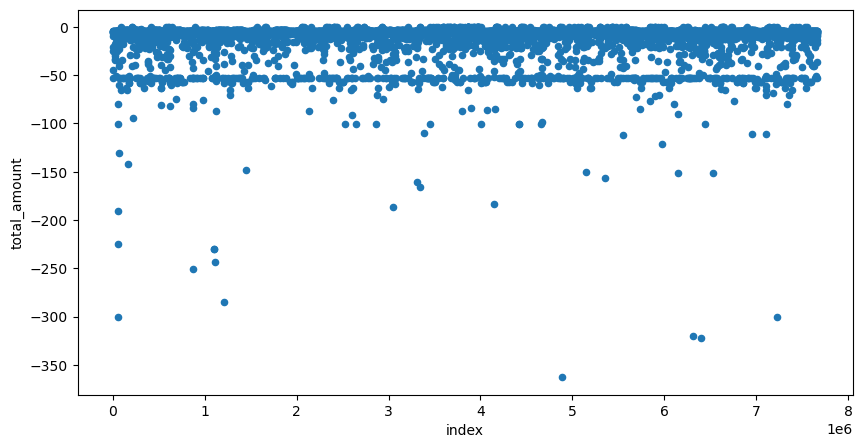

In [12]:
print(tripdata[tripdata['total_amount']<0].shape)
tripdata[tripdata['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))

In [13]:
tripdata[tripdata['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [14]:
tripdata[tripdata['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4088
4    2666
2     376
1       1
Name: count, dtype: int64

<Axes: >

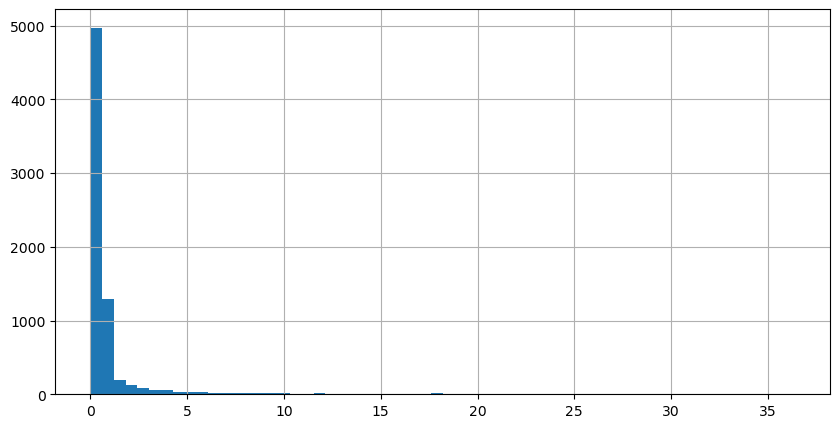

In [15]:
tripdata[tripdata['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [16]:
print(tripdata[tripdata['total_amount']==0].shape)
tripdata[tripdata['total_amount']==0].head()

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [17]:
tripdata[tripdata['total_amount']==0]['payment_type'].value_counts()

payment_type
1    815
2    569
3     29
4      1
Name: count, dtype: int64

<Axes: >

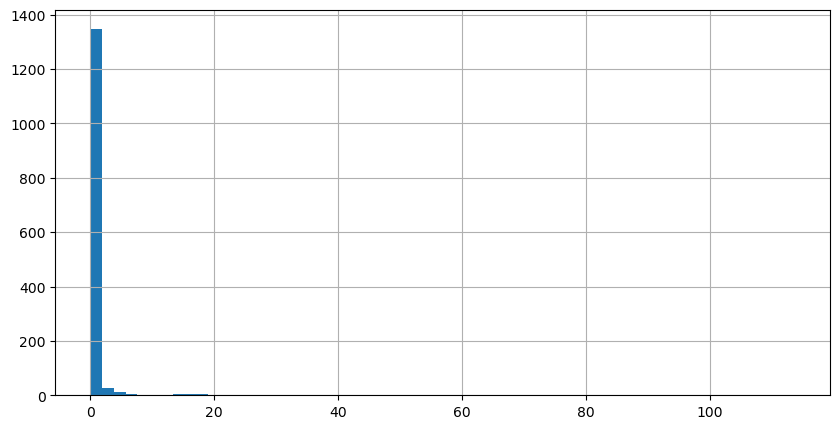

In [18]:
tripdata[tripdata['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [19]:
tripdata[tripdata['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1270
1.00        4
0.02        4
0.01        4
0.10        3
         ... 
0.59        1
10.84       1
2.91        1
1.20        1
0.53        1
Name: count, Length: 110, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

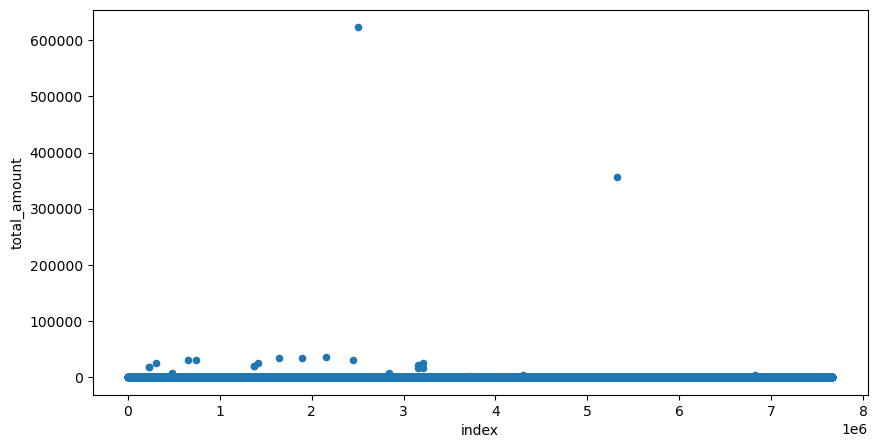

In [20]:
tripdata.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [21]:
tripdata[tripdata['total_amount']>200].shape

(1166, 9)

In [22]:
tripdata['total_amount'].mean()

15.68222215991253

## 3. Data Cleaning

In [23]:
tripdata2 = tripdata[(tripdata['total_amount']>=0) & (tripdata['total_amount']<200)]

In [24]:
print(tripdata.shape)
tripdata2.shape

(7667792, 9)


(7659490, 9)

In [25]:
tripdata2.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## 4. Data Preparation

In [26]:
trip_data_final = tripdata2.copy()

In [27]:
trip_data_final.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [28]:
#trip_data_final.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(trip_data_final.loc[:,'tpep_pickup_datetime'])
#trip_data_final.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(trip_data_final.loc[:,'tpep_dropoff_datetime'])

In [29]:
trip_data_final.loc[:,'RatecodeID'] = trip_data_final['RatecodeID'].astype(str)
trip_data_final.loc[:,'PULocationID'] = trip_data_final['PULocationID'].astype(str)
trip_data_final.loc[:,'DOLocationID'] = trip_data_final['DOLocationID'].astype(str)
trip_data_final.loc[:,'payment_type'] = trip_data_final['payment_type'].astype(str)

In [30]:
trip_data_final.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                object
PULocationID              object
DOLocationID              object
payment_type              object
total_amount             float64
dtype: object

In [31]:
trip_data_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [32]:
trip_data_final['tpep_pickup_datetime'] = pd.to_datetime(trip_data_final['tpep_pickup_datetime'])
trip_data_final['tpep_dropoff_datetime'] = pd.to_datetime(trip_data_final['tpep_dropoff_datetime'])

In [33]:
trip_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7659490 entries, 0 to 7667791
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   RatecodeID             object        
 5   PULocationID           object        
 6   DOLocationID           object        
 7   payment_type           object        
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 584.4+ MB


In [34]:
trip_data_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [35]:
trip_data_final['transaction_date'] = pd.to_datetime(trip_data_final['tpep_pickup_datetime'].dt.date)

In [36]:
trip_data_final['transaction_year'] = trip_data_final['tpep_pickup_datetime'].dt.year
trip_data_final['transaction_month'] = trip_data_final['tpep_pickup_datetime'].dt.month
trip_data_final['transaction_day'] = trip_data_final['tpep_pickup_datetime'].dt.day
trip_data_final['transaction_hour'] = trip_data_final['tpep_pickup_datetime'].dt.hour

In [37]:
trip_data_final.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

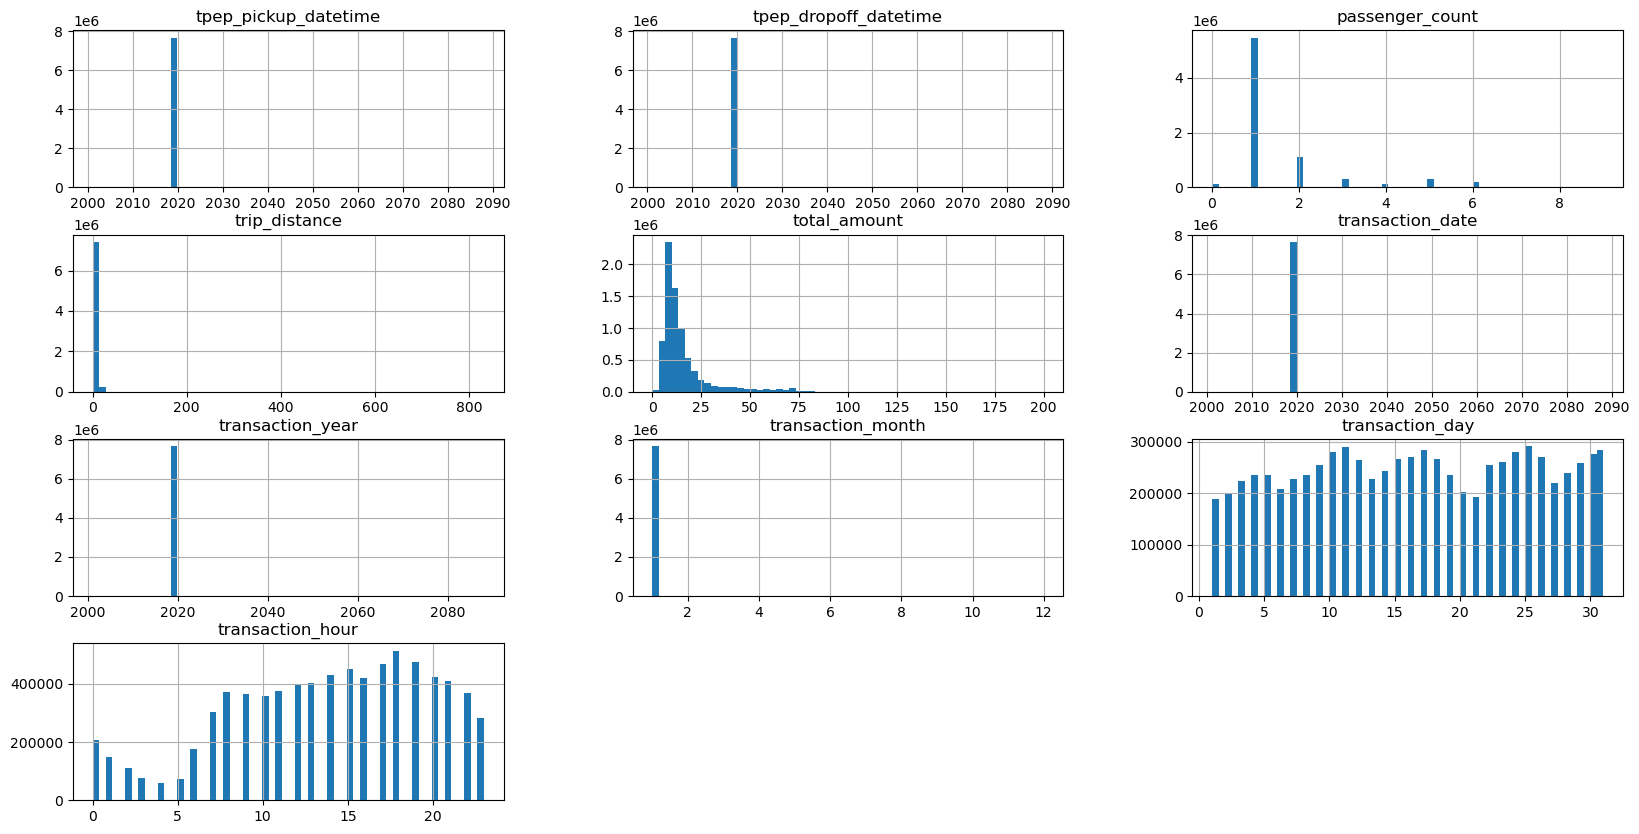

In [38]:
trip_data_final.hist(figsize=(20,10), bins=60)

In [39]:
trip_data_final = trip_data_final[trip_data_final['transaction_year']==2019]
trip_data_final = trip_data_final[trip_data_final['transaction_month']==1]

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

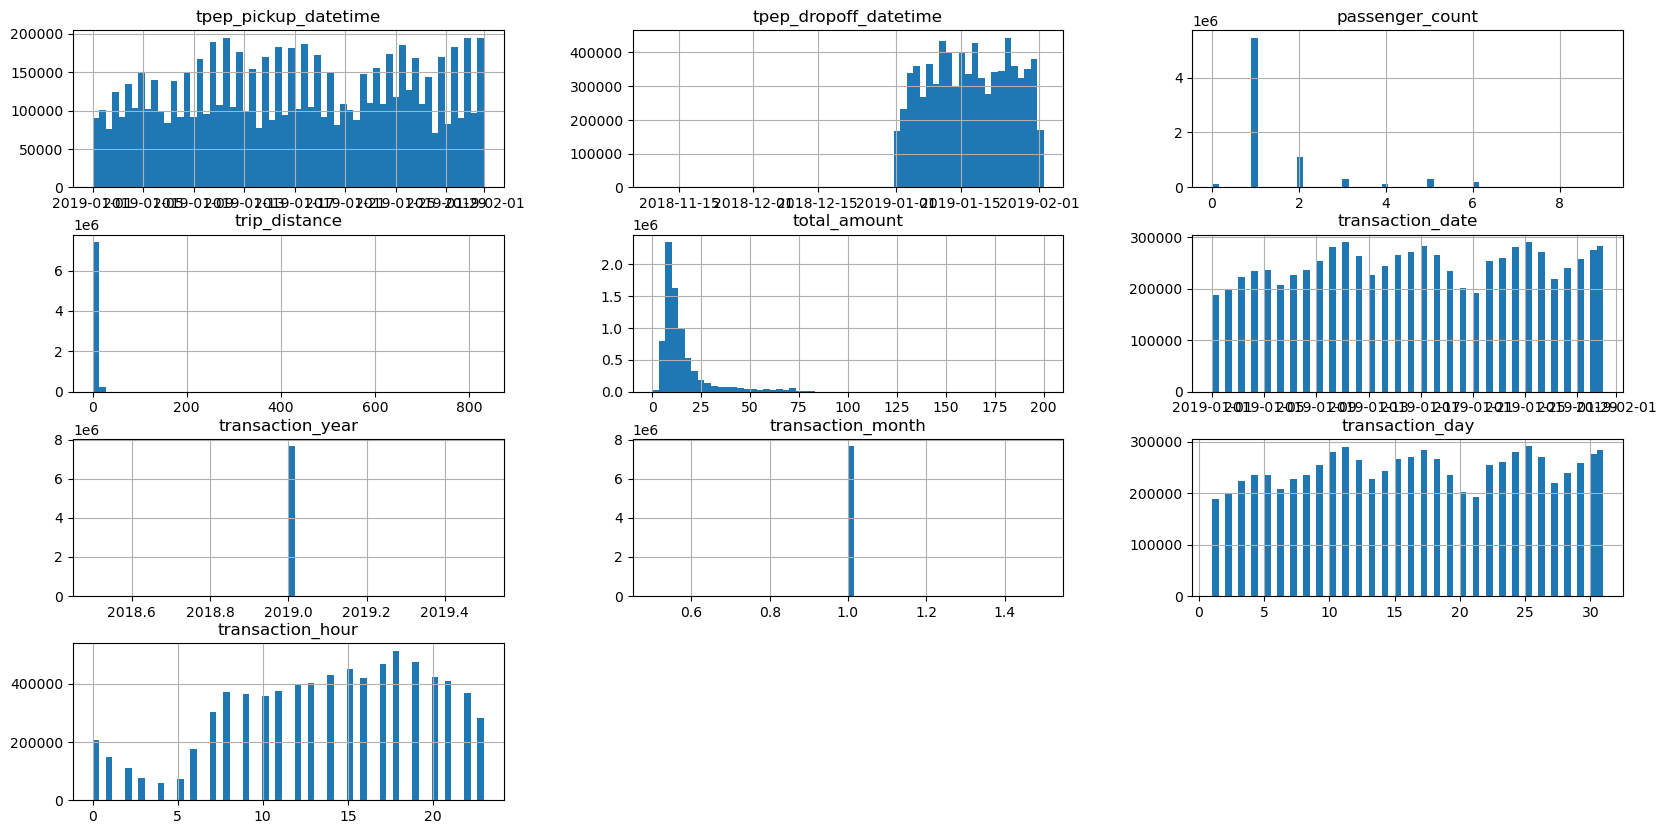

In [40]:
trip_data_final.hist(figsize=(20,10), bins=60)

In [41]:
# Problem Statement: Predict the average money people spend for a cab ride in NY in a certain region per hour

In [42]:
categorical_cols = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_cols = ['trip_distance','total_amount']
all_needed_cols = categorical_cols + numerical_cols

In [43]:
trip_data_final_new = trip_data_final[all_needed_cols]
print(trip_data_final_new.shape)
trip_data_final_new.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [44]:
trip_by_region = trip_data_final_new.groupby(categorical_cols).mean().reset_index()

In [45]:
trip_by_region['count_of_transactions'] = trip_data_final_new.groupby(categorical_cols).count().reset_index()['total_amount']
print(trip_by_region.shape)
trip_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<Axes: >

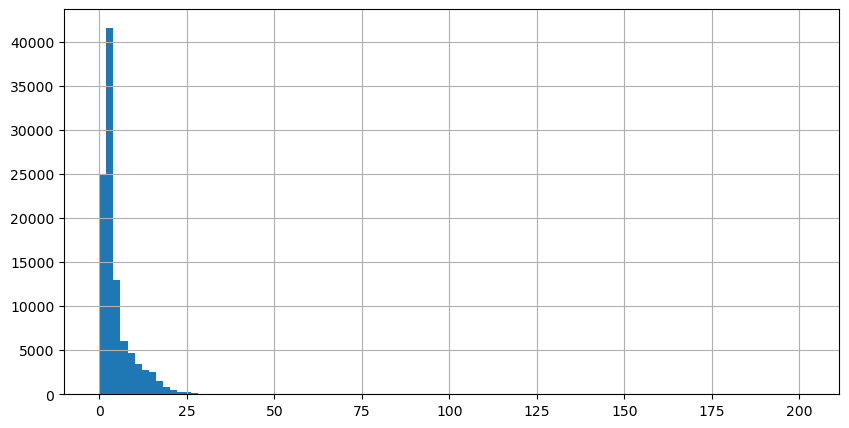

In [46]:
trip_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

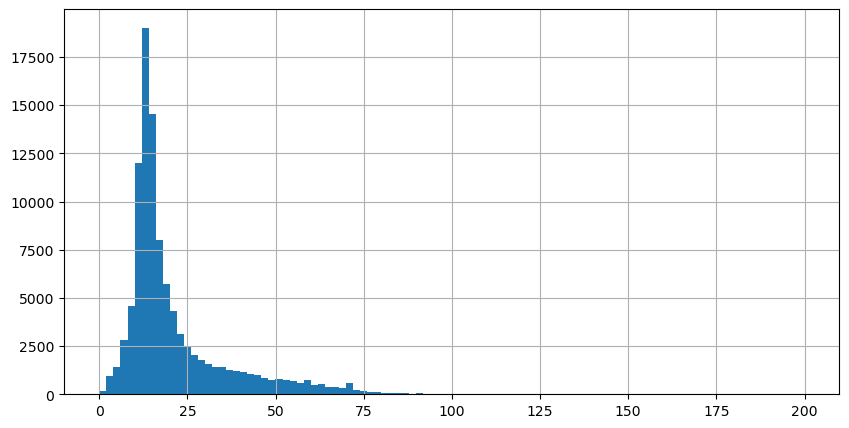

In [47]:
trip_by_region['total_amount'].hist(bins=100, figsize=(10,5))

In [48]:
trip_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102556 entries, 0 to 102555
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   PULocationID           102556 non-null  object        
 1   transaction_date       102556 non-null  datetime64[ns]
 2   transaction_month      102556 non-null  int32         
 3   transaction_day        102556 non-null  int32         
 4   transaction_hour       102556 non-null  int32         
 5   trip_distance          102556 non-null  float64       
 6   total_amount           102556 non-null  float64       
 7   count_of_transactions  102556 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(1)
memory usage: 5.1+ MB


## 5. Benchmark model

In [49]:
df_final = trip_by_region.copy()

In [50]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features = categorical_features + ['trip_distance']
target_features = 'total_amount'

###  5.1 Train-test split

In [51]:
from sklearn.model_selection import train_test_split

X = df_final[input_features]
y = df_final[target_features]

In [52]:
X.head()

,PULocationID,transaction_month,transaction_day,transaction_hour,trip_distance
0,1,1,1,2,0.0
1,1,1,1,5,0.0
2,1,1,1,6,0.0
3,1,1,1,8,0.0
4,1,1,1,10,16.9


In [53]:
# one-hot encode
X = pd.get_dummies(X)

In [54]:
X.head()

,transaction_month,transaction_day,transaction_hour,trip_distance,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_101,PULocationID_102,PULocationID_104,...,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_94,PULocationID_95,PULocationID_96,PULocationID_97,PULocationID_98,PULocationID_99
0,1,1,2,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,5,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,6,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,8,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,10,16.9,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 5.2 Fit a model to the data

In [56]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10)

### 5.3 Model Evaluation

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

model_at_hand = dt

y_pred = dt.predict(X_test)

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 3.4382875776163324
mean_squared_error 64.70900424029116
root_mean_squared_error 8.044190713818958
r2 0.7690820909837696


<Axes: xlabel='true', ylabel='pred'>

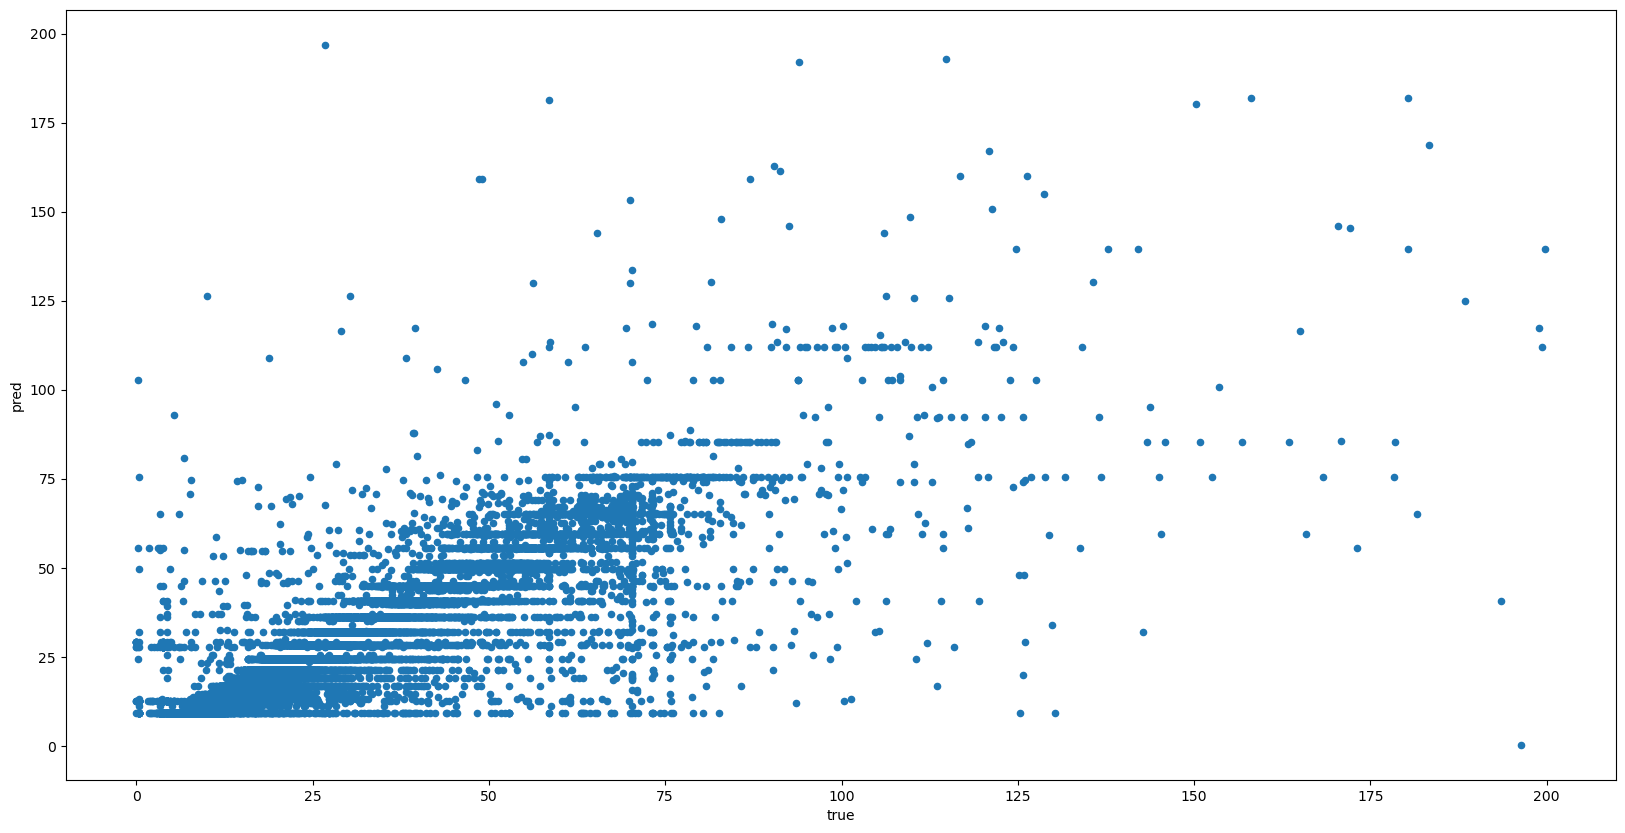

In [58]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20, 10), kind='scatter', x='true', y='pred')

In [59]:
results.head(5)

,true,pred
87264,17.513750,19.036027
96083,39.560000,40.717071
61216,30.110000,28.416422
35795,13.415000,16.723883
82022,28.163333,21.297745


### 5.4 Fix problems

In [60]:
# repeat the test again excluding trip_distance

categorical_features = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features = categorical_features
target_features = 'total_amount'

#Train and test split
X1 = df_final[input_features]
y1 = df_final[target_features]

# one-hot encode
X1 = pd.get_dummies(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

#Fit a model
dt1 = DecisionTreeRegressor(max_depth=10)
dt1.fit(X_train1, y_train1)

#Evaluate model
model_at_hand = dt1

y_pred1 = model_at_hand.predict(X_test1)

print('mean_absolute_error', mean_absolute_error(y_test1, y_pred1))
print('mean_squared_error', mean_squared_error(y_test1, y_pred1))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test1, y_pred1)))
print('r2', r2_score(y_test1, y_pred1))

mean_absolute_error 9.778013506685829
mean_squared_error 217.2348610979561
root_mean_squared_error 14.738889411958965
r2 0.22478454924304103


<Axes: xlabel='true', ylabel='pred'>

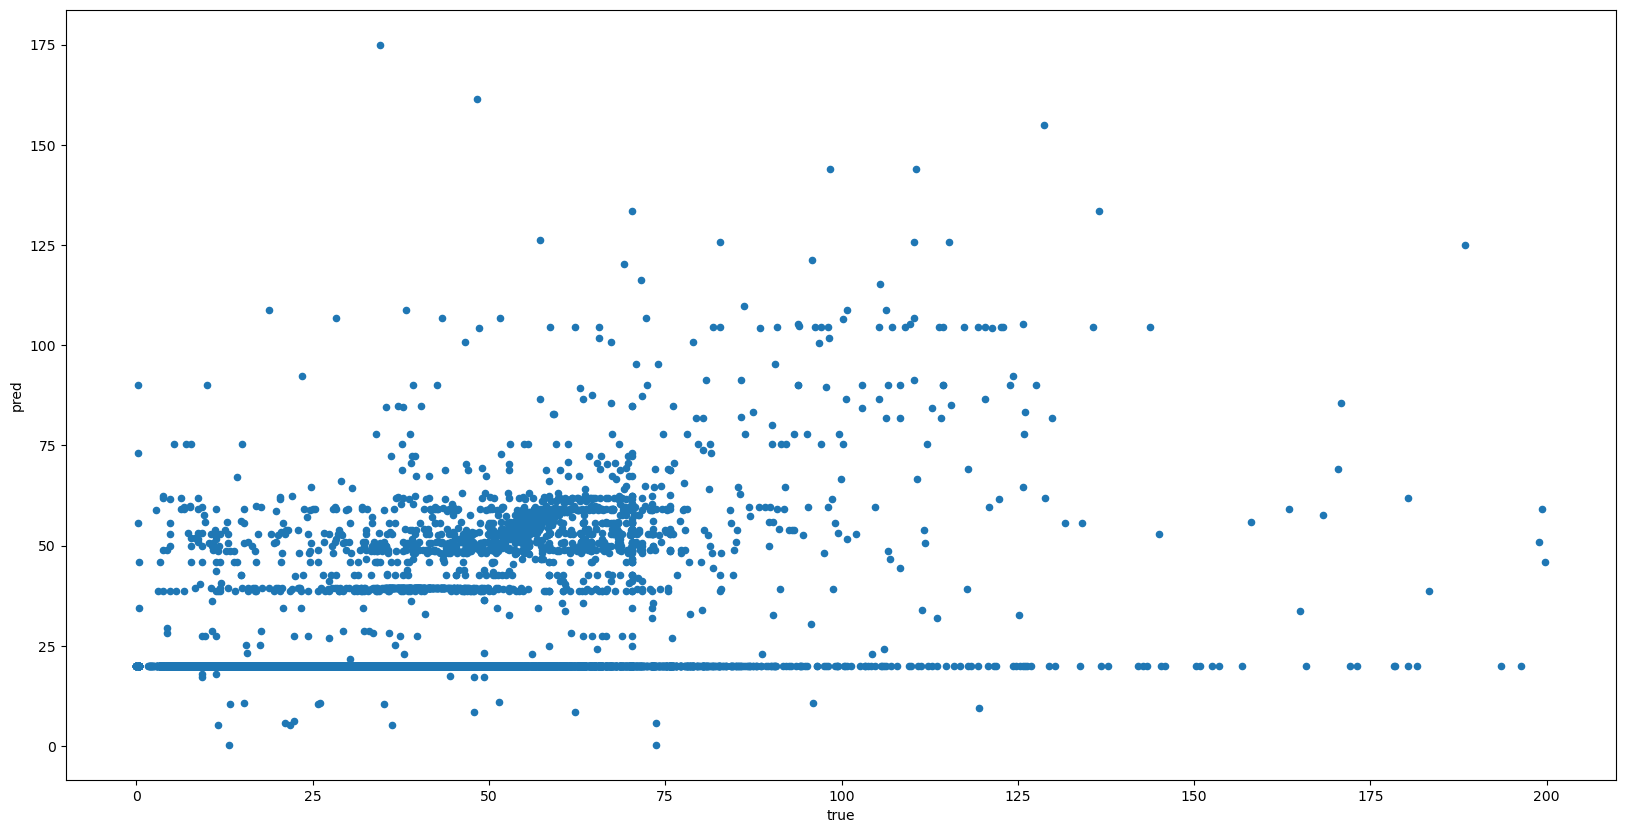

In [61]:
data = {'true': y_test1, 'pred': y_pred1}
results = pd.DataFrame(data)

results.plot(figsize=(20, 10), kind='scatter', x='true', y='pred')

## 6. Feature Engineering

In [62]:
trip_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [63]:
df_newfeature = trip_by_region.copy()

In [64]:
df_newfeature['transaction_week_day'] = df_newfeature['transaction_date'].dt.weekday

In [65]:
df_newfeature['weekend'] = df_newfeature['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [66]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                       end='2020').date
df_newfeature['is_holiday'] = df_newfeature['transaction_date'].isin(holidays)

In [67]:
df_newfeature.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


In [68]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID', 'Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [69]:
df_newfeature = df_newfeature.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

In [70]:
df_newfeature.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR


In [71]:
df_newfeature['Borough'].value_counts()

Borough
Manhattan        45309
Brooklyn         23633
Queens           22002
Bronx             9586
Unknown           1453
Staten Island      302
EWR                271
Name: count, dtype: int64

In [72]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')

In [73]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [74]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [75]:
nyc_weather['cloud cover'].value_counts()

cloud cover
70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [76]:
nyc_weather['amount of precipitation'].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0            

In [77]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [78]:
# Trace of precipitation can be assumed to be 0.1 
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
# nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [79]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'].interpolate(inplace=True)                                                                

In [80]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [81]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])

C:\Users\Femi\AppData\Local\Temp\ipykernel_11016\3776574042.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])


In [82]:
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [83]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [84]:
df_newfeature.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR


In [85]:
trip_with_weather = df_newfeature.merge(nyc_weather, how='left', left_on =['transaction_month', 'transaction_day', 'transaction_hour'], right_on =['month','day','hour'])

print(trip_with_weather.shape)
trip_with_weather.head()

(102556, 22)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [86]:
trip_with_weather = trip_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [87]:
trip_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR,15.6,62.0,11.0,0.7,0.473333


In [88]:
trip_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
LocationID                     0
Borough                        0
temperature                65726
humidity                   65726
wind speed                 65726
cloud cover                65726
amount of precipitation    65726
dtype: int64

In [89]:
trip_with_weather = trip_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [90]:
trip_with_weather = trip_with_weather.interpolate()
trip_with_weather = trip_with_weather.fillna(method='bfill')
trip_with_weather.isna().sum()

C:\Users\Femi\AppData\Local\Temp\ipykernel_11016\2078963488.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  trip_with_weather = trip_with_weather.interpolate()
C:\Users\Femi\AppData\Local\Temp\ipykernel_11016\2078963488.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trip_with_weather = trip_with_weather.fillna(method='bfill')


PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
LocationID                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [91]:
trip_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,10,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,100,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,106,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,107,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,11,Brooklyn,8.3,97.0,0.0,1.0,29.0


## 7. Model Training

In [92]:
trip_with_weather.columns

Index(['PULocationID', 'transaction_date', 'transaction_month',
       'transaction_day', 'transaction_hour', 'trip_distance', 'total_amount',
       'count_of_transactions', 'transaction_week_day', 'weekend',
       'is_holiday', 'LocationID', 'Borough', 'temperature', 'humidity',
       'wind speed', 'cloud cover', 'amount of precipitation'],
      dtype='object')

In [93]:
category_feature = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour',
                   'transaction_week_day', 'weekend','is_holiday','Borough']
input_features = categorical_features + ['temperature', 'humidity',
                   'wind speed', 'cloud cover', 'amount of precipitation']
target_feature = 'total_amount'

In [94]:
model_df = trip_with_weather.copy()

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = model_df[input_features]
y = model_df[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 7.1 Decision Tree

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [99]:
y_pred = dt.predict(X_test)

In [100]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.875594936579814
mean_squared_error 223.8837367911966
root_mean_squared_error 14.962744961777455
r2 0.2107958238410348


<Axes: xlabel='true', ylabel='pred'>

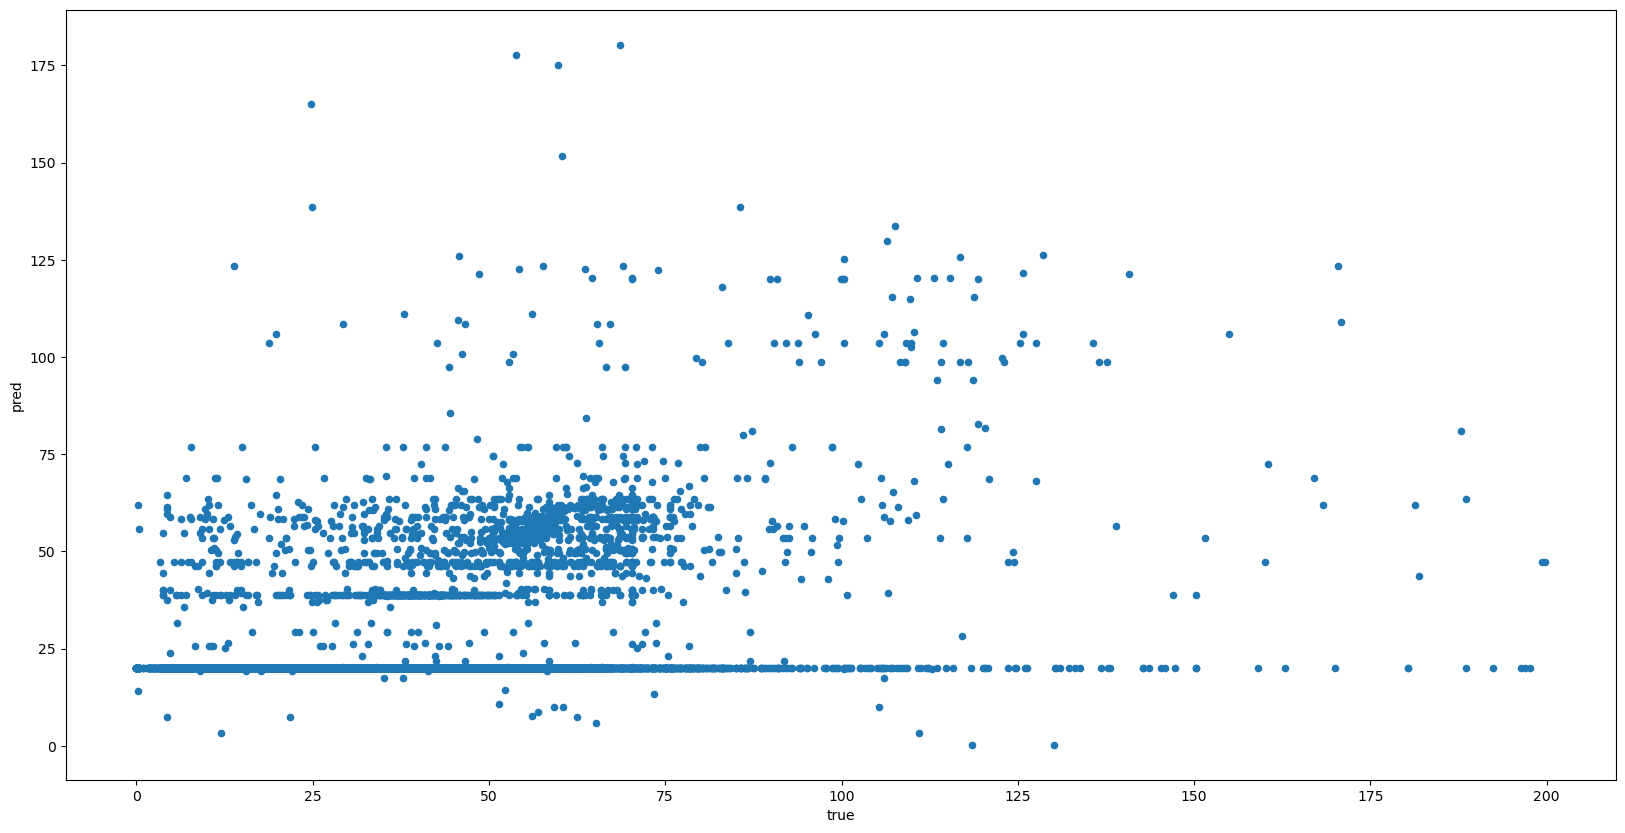

In [101]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [102]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [103]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    y_pred_train = decision_tree_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = decision_tree_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [104]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,15.762803,16.080695
1,5,15.024346,15.401195
2,8,14.498673,15.138920
3,10,14.150790,14.972086
4,15,13.406639,15.117290
5,20,12.768331,15.212525
6,30,11.872243,15.514640
7,50,10.520998,15.874633
8,70,9.237931,16.224215
9,100,7.615259,16.557826


Text(0, 0.5, 'root mean squared error')

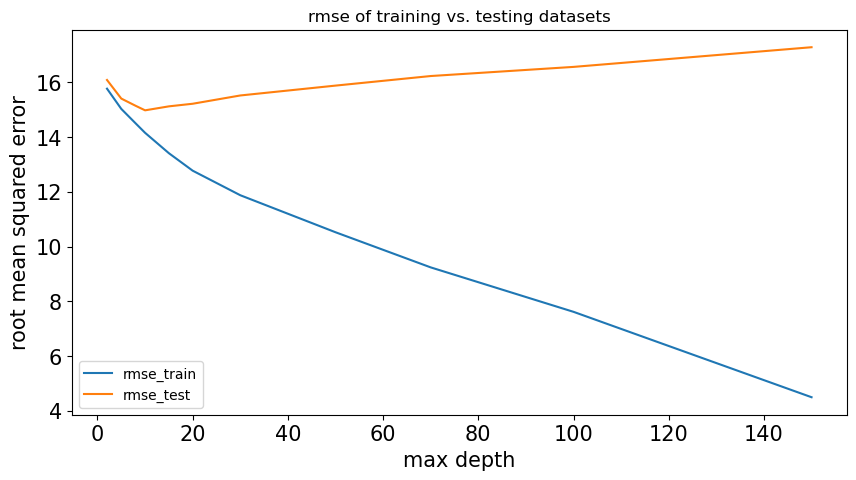

In [105]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

### Underfit

In [106]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [107]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance
y_pred_underfit = decision_tree_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 11.2248041559963
mean_squared_error 259.4793147563978
root_mean_squared_error 16.10836164097385
r2 0.048975448815563594


In [108]:
# Testing performance

y_pred_underfit = decision_tree_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 11.355392253777822
mean_squared_error 267.4279782103413
root_mean_squared_error 16.353225315219664
r2 0.05729964913802943


### 7.2 Random forest

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.662957293210719
mean_squared_error 184.95649993144312
root_mean_squared_error 13.599871320400172
r2 0.3480167686776794


<Axes: xlabel='true', ylabel='pred'>

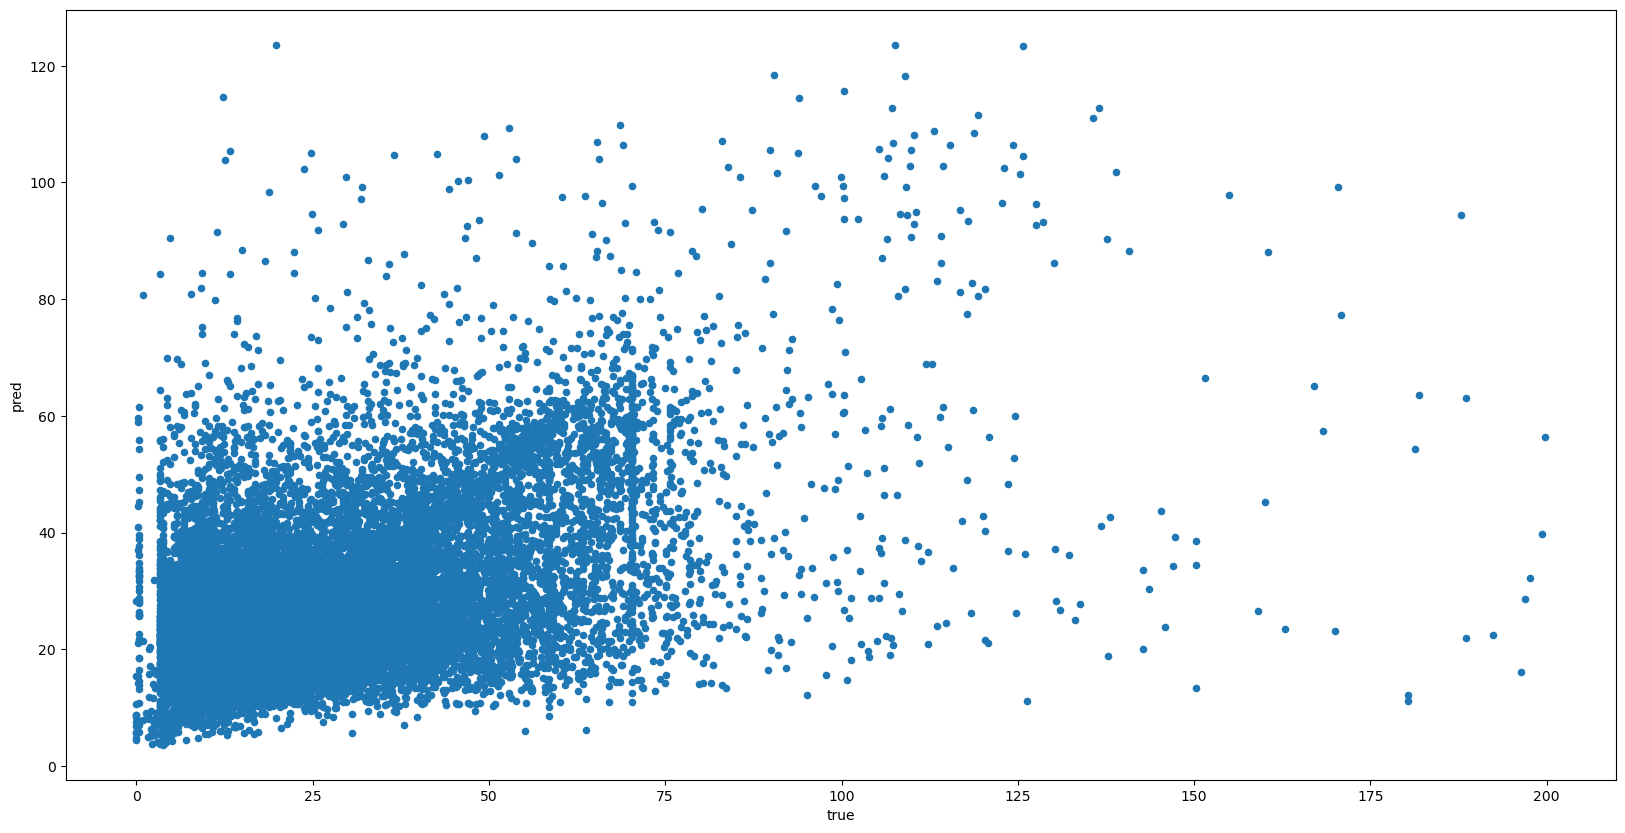

In [112]:
data = {'true' : y_test, 'pred' : y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20, 10), kind='scatter', x='true', y='pred')

### 7.3 Gradient boosting

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [114]:
y_pred = gb.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.52472280191137
mean_squared_error 201.17657539147285
root_mean_squared_error 14.183672845616288
r2 0.29083998811229284


<Axes: xlabel='true', ylabel='pred'>

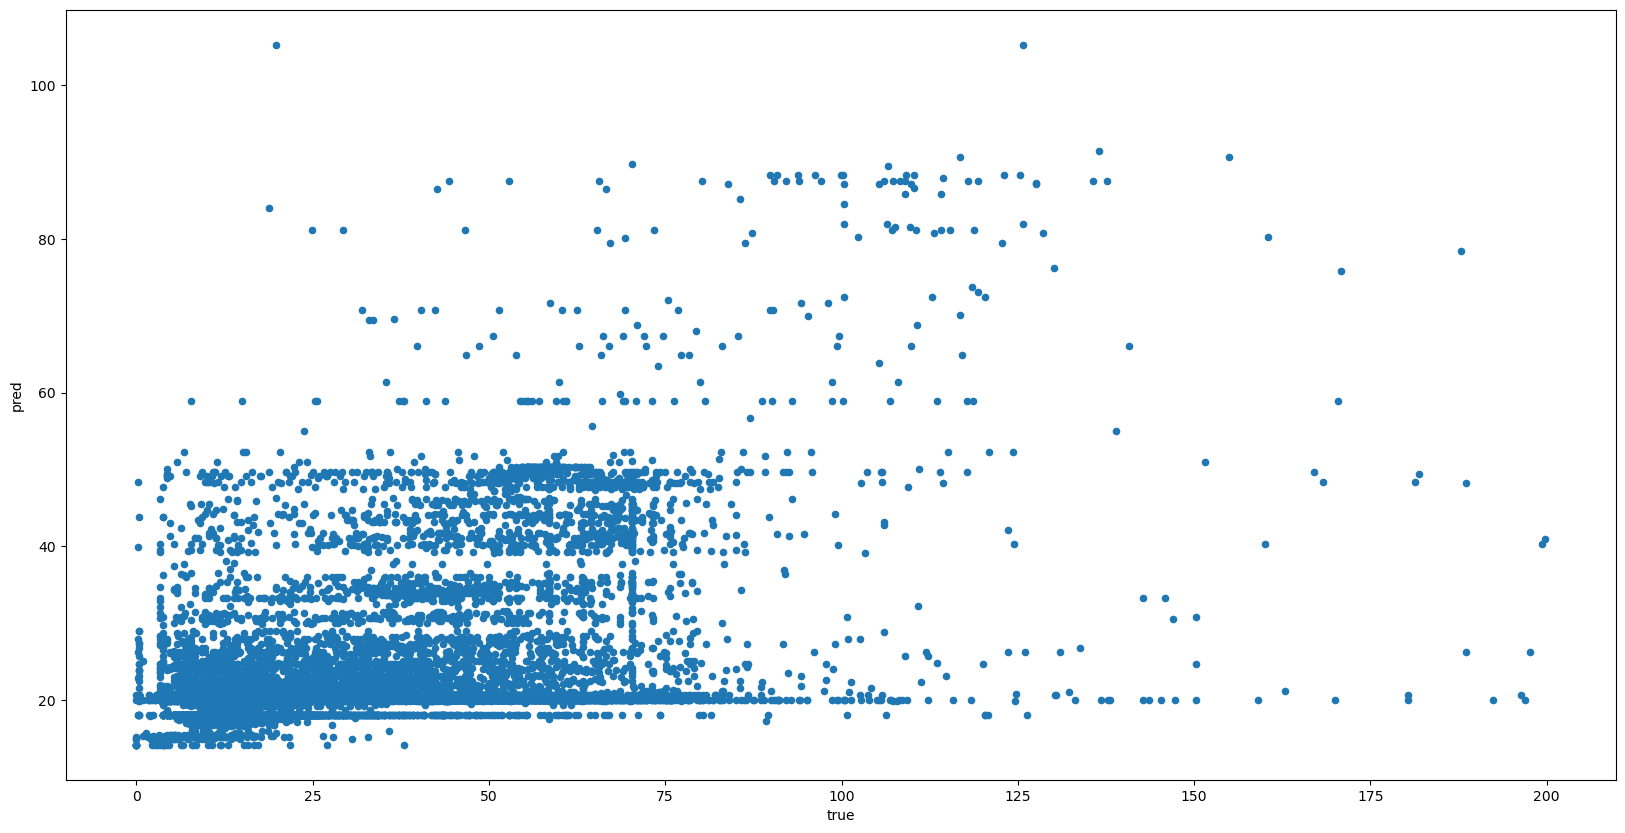

In [115]:
data = {'true' : y_test, 'pred' : y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20, 10), kind='scatter', x='true', y='pred')

<Axes: >

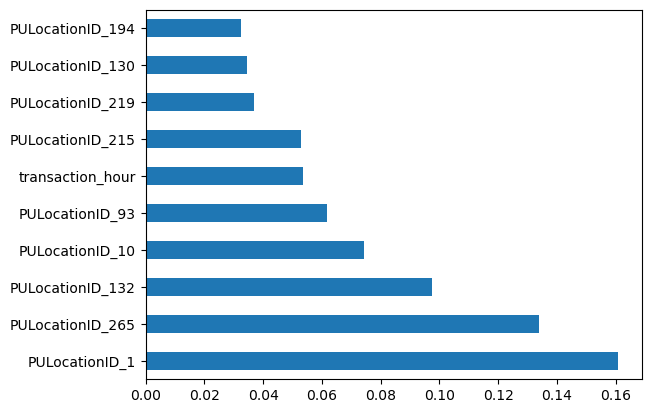

In [116]:
(pd.Series(gb.feature_importances_, index=X_train.columns)
    .nlargest(10)
    .plot(kind='barh'))

## 8 Tuning

### 8.1 Find best parameters

In [120]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10, 20, 50, 100, 150, 200, 300, 500]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [121]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [122]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using J fold cross validation
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Femi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Femi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Femi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Femi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Femi\anaconda3\Lib\site-packages\sklearn

In [123]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,316.380662,1.131680e+00,11.199705,0.845402,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.385213,0.408338,0.402721,0.398757,0.009848,3
1,34.810983,1.448662e-01,1.463199,0.070248,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.261919,0.272529,0.269719,0.268056,0.004488,6
2,49.855871,1.892875e+00,1.411128,0.051548,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.262324,0.271421,0.271894,0.268546,0.004404,5
3,0.114556,7.364178e-03,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,8
4,0.104142,7.363560e-03,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,8
5,1463.655662,8.241104e-01,29.859543,2.172694,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.357047,0.380239,0.377360,0.371549,0.010322,4
6,137.769313,2.825220e+00,5.172591,0.076662,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.175870,0.184295,0.179977,0.180047,0.003440,7
7,1152.281868,4.593177e+00,41.971047,2.875725,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.395511,0.416639,0.412801,0.408317,0.009190,1
8,0.109350,8.778064e-07,0.000000,0.000000,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,8
9,789.243277,2.256608e+02,25.348947,9.338116,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.393193,0.416956,0.412739,0.407630,0.010352,2


In [125]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [127]:
import time
t0 = time.time()

best = RandomForestRegressor(n_estimators=1400, min_samples_split=10,
min_samples_leaf=10,
max_features= 'sqrt',
max_depth= None,
bootstrap= True)
best.fit(X_train, y_train)
                             
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")

nmodel = best

y_pred = nmodel.predict(X_test)
                             
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
                             
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  729.4230871200562  seconds
mean_absolute_error 7.445903666985034
mean_squared_error 163.64661392069843
root_mean_squared_error 12.79244362585579
r2 0.42313544980294693


In [129]:
from sklearn.ensemble import RandomForestRegressor

import time
t0 = time.time()

second_best = RandomForestRegressor(n_estimators=600, min_samples_split=10,
min_samples_leaf=2,
max_features= 'sqrt',
max_depth= 500,
bootstrap= False)
second_best.fit(X_train, y_train)
                             
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")

nmodel = second_best

y_pred = nmodel.predict(X_test)
                             
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
                             
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  555.4777362346649  seconds
mean_absolute_error 7.347809669742241
mean_squared_error 167.0912029016152
root_mean_squared_error 12.926376247874545
r2 0.41099305818552445


<Axes: xlabel='true', ylabel='pred'>

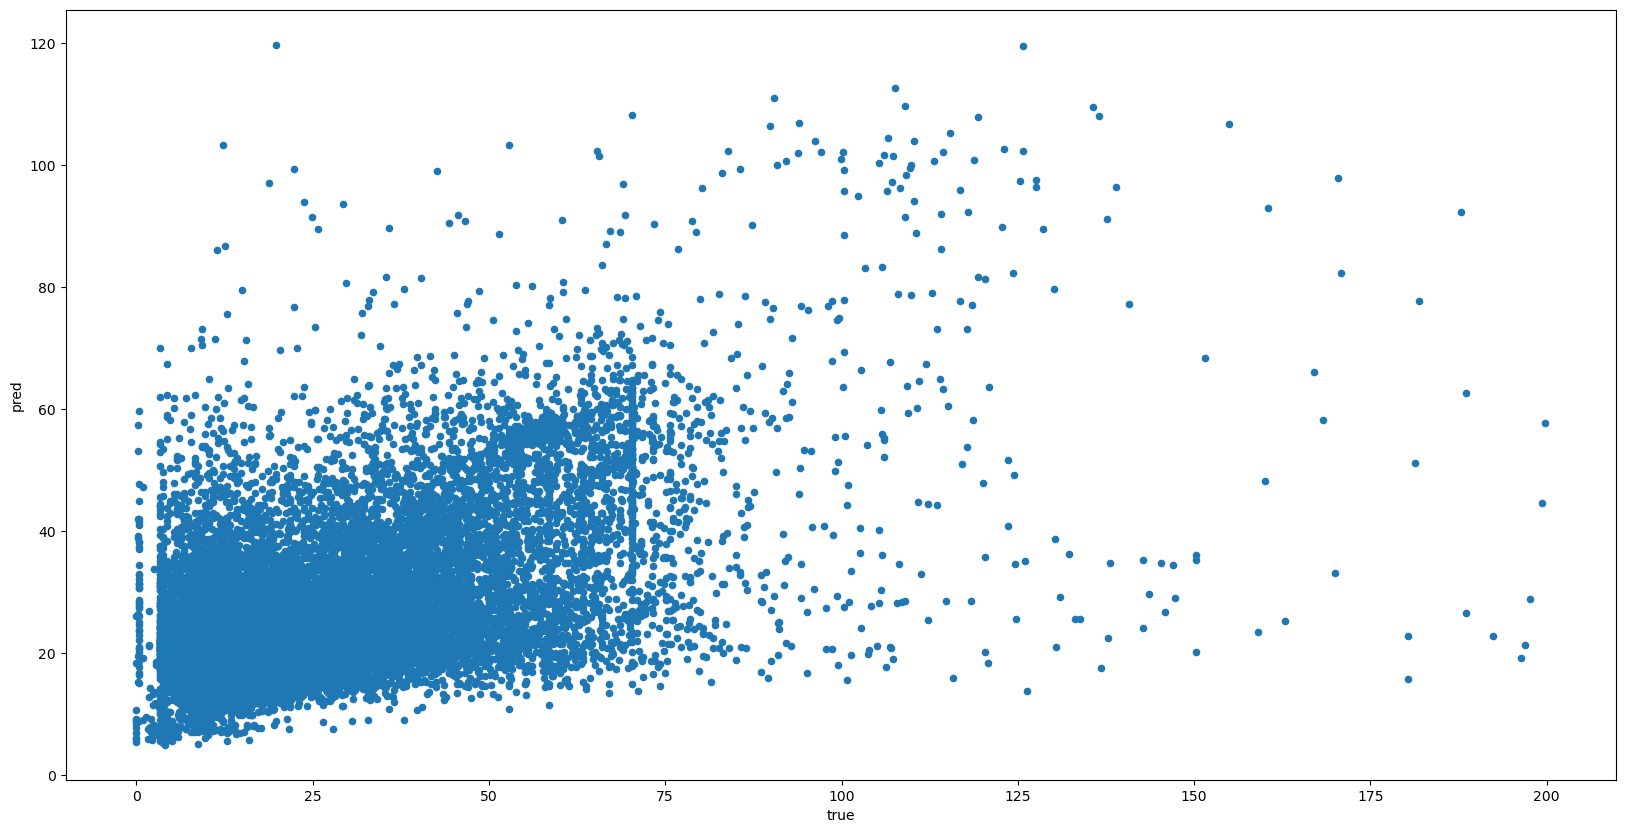

In [130]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20, 10), kind='scatter', x='true', y='pred')